In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras

In [2]:
train = pd.read_csv('input/train.csv')
test =  pd.read_csv('input/test.csv')

/home/xor/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


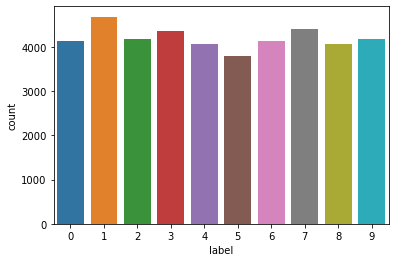

In [3]:
y_train = train.label
X_train = train.drop('label', axis=1)

g = sns.countplot(y_train)

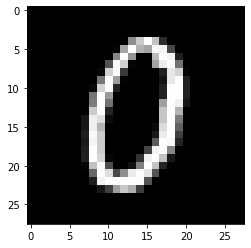

In [4]:
plt.imshow(X_train.iloc[5].to_numpy().reshape(28, 28, 1), cmap='gray')

In [5]:
X_train = X_train / 255
test = test / 255

In [6]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [7]:
del train

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model 1

* Blind First Attempt, not using Convolutional and Pooling Layers
* Using Dense layers for simplicity

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.9107 - val_loss: 0.1888 - val_accuracy: 0.9449
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1303 - accuracy: 0.9612 - val_loss: 0.1273 - val_accuracy: 0.9600
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0905 - accuracy: 0.9719 - val_loss: 0.1106 - val_accuracy: 0.9674
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.1143 - val_accuracy: 0.9652
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.1073 - val_accuracy: 0.9695
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.1080 - val_accuracy: 0.9671
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0338 - accuracy: 0.9882 - val_loss: 0.1100 - val_accuracy:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


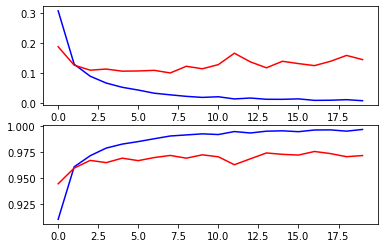

In [13]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validiation accuracy')
ax[1].legend()

# Model 1 Interpretation:

* Significant amount of overfitting, 

# Model 2
Based on the results performance of Model 1 we will make the following improvements:
* Dropout Regularisation to reduce overfitting
* EarlyStopping callback to reduce overfiiting
* Lowered the number of Dense Layers to reduce parameters

In [14]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [15]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(100, activation='relu'))

model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[earlystopping])

Epoch 1/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3930 - accuracy: 0.8854 - val_loss: 0.2130 - val_accuracy: 0.9374
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1918 - accuracy: 0.9431 - val_loss: 0.1591 - val_accuracy: 0.9533
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1440 - accuracy: 0.9568 - val_loss: 0.1257 - val_accuracy: 0.9637
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1170 - accuracy: 0.9648 - val_loss: 0.1136 - val_accuracy: 0.9656
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1009 - accuracy: 0.9691 - val_loss: 0.1099 - val_accuracy: 0.9668
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0879 - accuracy: 0.9726 - val_loss: 0.0984 - val_accuracy: 0.9700
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.0940 - val_accuracy:

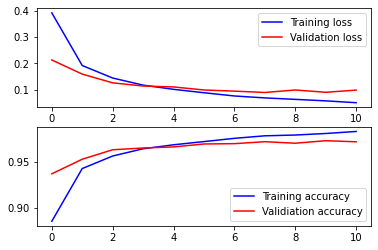

In [34]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history2.history['loss'], color='b', label='Training loss')
ax[0].plot(history2.history['val_loss'], color='r', label='Validation loss')
ax[0].legend()

ax[1].plot(history2.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history2.history['val_accuracy'], color='r', label='Validiation accuracy')
ax[1].legend()

# Evaluation of both Models

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Modified code from:https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6


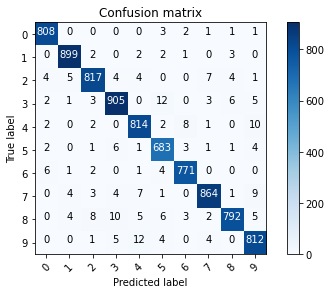

In [36]:
Y_pred = model.predict(X_val)
Y_pred_classes = [np.argmax(pred) for pred in Y_pred]

Y_true = y_val
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


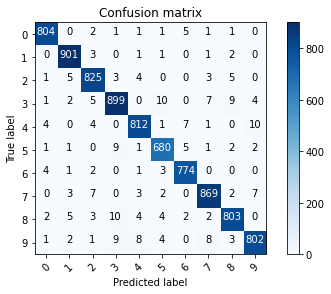

In [37]:
Y_pred = model2.predict(X_val)
Y_pred_classes = [np.argmax(pred) for pred in Y_pred]

Y_true = y_val
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [40]:
train_model_1 = model.evaluate(x=X_train, y=y_train, batch_size=32)
val_model_1 = model.evaluate(x=X_val, y=y_val, batch_size=32)

train_model_1, val_model_1

263/263 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9720


([0.006124433130025864, 0.9979166388511658],
 [0.1458509862422943, 0.9720237851142883])

In [41]:
train_model_2 = model2.evaluate(x=X_train, y=y_train, batch_size=32)
val_model_2 = model2.evaluate(x=X_val, y=y_val, batch_size=32)

train_model_2, val_model_2

263/263 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9725


([0.031136980280280113, 0.9915773868560791],
 [0.08893197029829025, 0.9725000262260437])

In [49]:
results = model2.predict(test)

results = [np.argmax(pred) for pred in results]

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), pd.Series(results,name='Label')],axis = 1)

submission.to_csv("submission.csv",index=False)